tips : pilih toolbar > edit > notebook setting > GPU

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/kc_house_data.csv').dropna()
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X = data.drop(columns=['id','date','zipcode'])
y = data['price']

In [ ]:
y.mean()

540088.1417665294

In [ ]:
#Memisahkan data menjadi train, val, test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [ ]:
len(X.columns)

18

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_val)
X_test_std = std.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)]))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1, activation='relu'))

In [ ]:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_std, y_train, epochs=40, batch_size=32,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
487/487 [==============================] - 5s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/40
487/487 [====================

##Kernel Initializers

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.RandomNormal(seed=40)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

In [ ]:
history = model.fit(X_train_std, y_train, epochs=40, batch_size=32,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
487/487 [==============================] - 3s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/40
487/487 [==============================] - 2s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/40
487/487 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/40
487/487 [====================

## Batch Size

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/40
223/223 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/40
223/223 [====================

## Activation Function

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))

model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 2s 5ms/step - loss: 849604.9375 - mae: 849604.9375 - val_loss: 540082.5625 - val_mae: 540082.5625
Epoch 2/40
223/223 [==============================] - 1s 3ms/step - loss: 539598.4375 - mae: 539598.4375 - val_loss: 540047.5000 - val_mae: 540047.4375
Epoch 3/40
223/223 [==============================] - 1s 3ms/step - loss: 538988.1250 - mae: 538988.1250 - val_loss: 537255.9375 - val_mae: 537255.9375
Epoch 4/40
223/223 [==============================] - 1s 3ms/step - loss: 488022.3438 - mae: 488022.3438 - val_loss: 314907.9062 - val_mae: 314907.9062
Epoch 5/40
223/223 [==============================] - 1s 3ms/step - loss: 231480.7344 - mae: 231480.7344 - val_loss: 220407.8750 - val_mae: 220407.8750
Epoch 6/40
223/223 [==============================] - 1s 3ms/step - loss: 222295.9062 - mae: 222295.9062 - val_loss: 220455.0781 - val_mae: 220455.0781
Epoch 7/40
223/223 [==============================] - 1s 3ms/step - loss: 222281.1875 - 

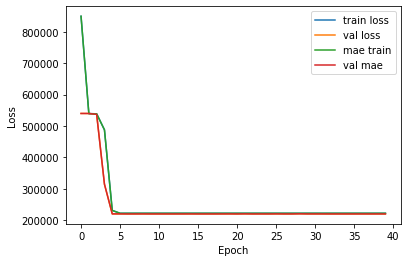

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

##Batch normalization

struktur batch normalization yang sesuai adalah dilakukan sebelum activation function

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 2s 5ms/step - loss: 540461.2500 - mae: 540461.2500 - val_loss: 542827.3750 - val_mae: 542827.3750
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 540138.1875 - mae: 540138.1875 - val_loss: 541427.2500 - val_mae: 541427.2500
Epoch 3/40
223/223 [==============================] - 1s 4ms/step - loss: 513987.5000 - mae: 513987.5000 - val_loss: 394790.2812 - val_mae: 394790.3125
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 176657.6875 - mae: 176657.6875 - val_loss: 484618.0625 - val_mae: 484618.0625
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 59551.3516 - mae: 59551.3516 - val_loss: 139533.9688 - val_mae: 139533.9688
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 52955.5547 - mae: 52955.5547 - val_loss: 78566.8047 - val_mae: 78566.8047
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 55120.3555 - mae: 55

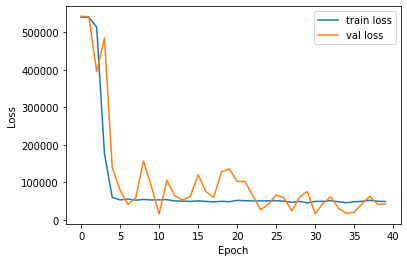

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Dropout

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 7ms/step - loss: 539594.3750 - mae: 539594.3750 - val_loss: 540021.2500 - val_mae: 540021.2500
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 538445.5000 - mae: 538445.5000 - val_loss: 534719.9375 - val_mae: 534719.9375
Epoch 3/40
223/223 [==============================] - 1s 4ms/step - loss: 451036.7500 - mae: 451036.7500 - val_loss: 603378.8125 - val_mae: 603378.9375
Epoch 4/40
223/223 [==============================] - 1s 4ms/step - loss: 144091.6719 - mae: 144091.6719 - val_loss: 215432.5000 - val_mae: 215432.5000
Epoch 5/40
223/223 [==============================] - 1s 4ms/step - loss: 113740.2188 - mae: 113740.2188 - val_loss: 45701.2266 - val_mae: 45701.2266
Epoch 6/40
223/223 [==============================] - 1s 4ms/step - loss: 108855.7422 - mae: 108855.7422 - val_loss: 53268.1328 - val_mae: 53268.1328
Epoch 7/40
223/223 [==============================] - 1s 4ms/step - loss: 109589.8594 - mae:

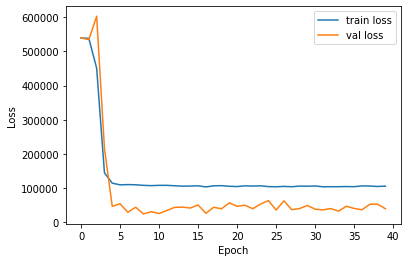

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Lerning Rate

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 7ms/step - loss: 539608.8750 - mae: 539608.8750 - val_loss: 540084.6875 - val_mae: 540084.6875
Epoch 2/40
223/223 [==============================] - 1s 4ms/step - loss: 539608.9375 - mae: 539608.9375 - val_loss: 540084.6875 - val_mae: 540084.6875
Epoch 3/40
223/223 [==============================] - 1s 4ms/step - loss: 539608.8125 - mae: 539608.8125 - val_loss: 540084.6875 - val_mae: 540084.6875
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 539608.7500 - mae: 539608.7500 - val_loss: 540084.6875 - val_mae: 540084.6875
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 539608.6875 - mae: 539608.6875 - val_loss: 540084.6250 - val_mae: 540084.6250
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 539608.6875 - mae: 539608.6875 - val_loss: 540084.6250 - val_mae: 540084.6250
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 539608.6875 - 

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.08),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 2s 5ms/step - loss: 284160.6875 - mae: 284160.6875 - val_loss: 334180.5312 - val_mae: 334180.5312
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 115010.1172 - mae: 115010.1172 - val_loss: 79669.4531 - val_mae: 79669.4531
Epoch 3/40
223/223 [==============================] - 1s 4ms/step - loss: 113480.5234 - mae: 113480.5234 - val_loss: 153626.9688 - val_mae: 153626.9688
Epoch 4/40
223/223 [==============================] - 1s 4ms/step - loss: 110886.6406 - mae: 110886.6406 - val_loss: 67921.2734 - val_mae: 67921.2734
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 111282.6094 - mae: 111282.6094 - val_loss: 84207.2500 - val_mae: 84207.2500
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 112277.1641 - mae: 112277.1641 - val_loss: 51731.5586 - val_mae: 51731.5586
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 112984.3359 - mae: 112

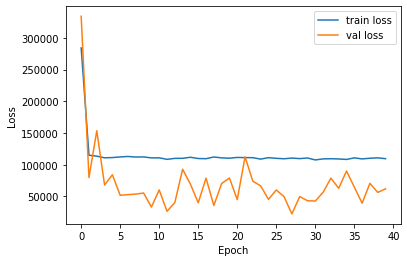

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Gradient Cliping

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(clipvalue=1.0),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 7ms/step - loss: 539602.6875 - mae: 539602.6875 - val_loss: 540065.3750 - val_mae: 540065.3750
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 539551.9375 - mae: 539551.9375 - val_loss: 539981.1250 - val_mae: 539981.1250
Epoch 3/40
223/223 [==============================] - 1s 5ms/step - loss: 539431.5000 - mae: 539431.5000 - val_loss: 539825.4375 - val_mae: 539825.4375
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 539234.8750 - mae: 539234.8750 - val_loss: 539581.5000 - val_mae: 539581.5000
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 538956.3125 - mae: 538956.3125 - val_loss: 539268.2500 - val_mae: 539268.2500
Epoch 6/40
223/223 [==============================] - 1s 6ms/step - loss: 538604.6875 - mae: 538604.6875 - val_loss: 538861.3750 - val_mae: 538861.3750
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 538163.5625 - 

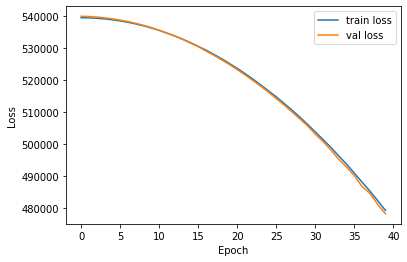

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Regularisasi

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 2s 6ms/step - loss: 255105.0000 - mae: 254334.5781 - val_loss: 329022.8125 - val_mae: 327619.1562
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 114919.7812 - mae: 113557.4375 - val_loss: 43140.5078 - val_mae: 41727.8320
Epoch 3/40
223/223 [==============================] - 1s 5ms/step - loss: 114920.3672 - mae: 113548.1094 - val_loss: 56184.6328 - val_mae: 54842.4414
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 116114.1562 - mae: 112412.2266 - val_loss: 85262.8359 - val_mae: 82476.0000
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 116865.4922 - mae: 114560.6562 - val_loss: 78640.6328 - val_mae: 76597.0000
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 113201.1406 - mae: 111380.1328 - val_loss: 37522.2617 - val_mae: 35833.9766
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 112864.6406 - mae: 11128

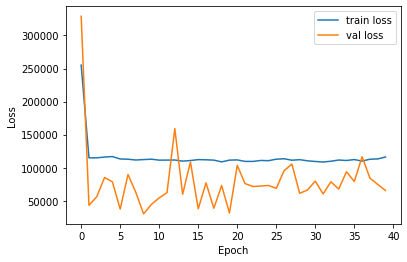

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Activation Function Elu

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 6ms/step - loss: 258942.8906 - mae: 257312.4219 - val_loss: 205075.3125 - val_mae: 202611.7500
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 115655.7656 - mae: 113501.7344 - val_loss: 38820.0039 - val_mae: 36876.3203
Epoch 3/40
223/223 [==============================] - 1s 5ms/step - loss: 114213.5000 - mae: 112443.1406 - val_loss: 57026.8438 - val_mae: 55361.4688
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 112826.4375 - mae: 111281.7188 - val_loss: 60854.6875 - val_mae: 59361.8477
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 111484.2578 - mae: 109977.9531 - val_loss: 100502.3672 - val_mae: 98990.3828
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 109587.7344 - mae: 108108.5859 - val_loss: 63380.0078 - val_mae: 61915.4297
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 111373.1328 - mae: 1098

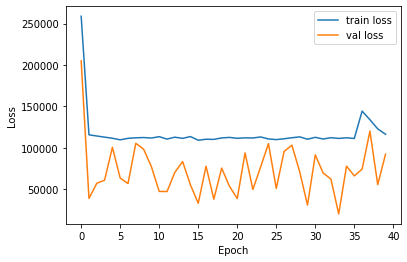

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

### Combination Activation Function

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(60,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(50,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(20,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))


model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 5s 8ms/step - loss: 340676.8438 - mae: 324371.6875 - val_loss: 274021.7500 - val_mae: 225943.7969
Epoch 2/40
223/223 [==============================] - 2s 7ms/step - loss: 2353882.5000 - mae: 232683.7188 - val_loss: 2986666.0000 - val_mae: 234676.6562
Epoch 3/40
223/223 [==============================] - 2s 7ms/step - loss: 2066562.8750 - mae: 232376.2031 - val_loss: 1367916.7500 - val_mae: 220633.2656
Epoch 4/40
223/223 [==============================] - 2s 7ms/step - loss: 996628.4375 - mae: 231360.0938 - val_loss: 1452508.2500 - val_mae: 377685.9375
Epoch 5/40
223/223 [==============================] - 2s 7ms/step - loss: 946199.5000 - mae: 232989.8906 - val_loss: 665203.9375 - val_mae: 225055.4844
Epoch 6/40
223/223 [==============================] - 2s 7ms/step - loss: 669291.5625 - mae: 234493.4688 - val_loss: 581785.8125 - val_mae: 220503.6875
Epoch 7/40
223/223 [==============================] - 2s 7ms/step - loss: 1138603.8

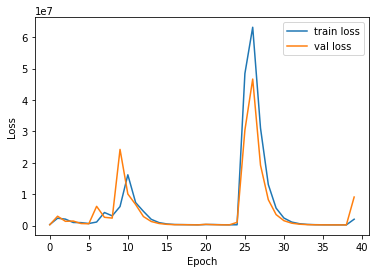

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

### Optimaizer

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 6ms/step - loss: 539608.9375 - mae: 539608.6250 - val_loss: 540083.8750 - val_mae: 540083.6875
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 539606.3750 - mae: 539606.1875 - val_loss: 540080.7500 - val_mae: 540080.5000
Epoch 3/40
223/223 [==============================] - 1s 5ms/step - loss: 539602.1250 - mae: 539602.0000 - val_loss: 540075.3125 - val_mae: 540075.2500
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 539595.8750 - mae: 539595.6250 - val_loss: 540068.3125 - val_mae: 540068.0625
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 539587.8750 - mae: 539587.6875 - val_loss: 540059.4375 - val_mae: 540059.3750
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 539578.1250 - mae: 539578.0000 - val_loss: 540049.1250 - val_mae: 540049.0625
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 539566.8750 - 

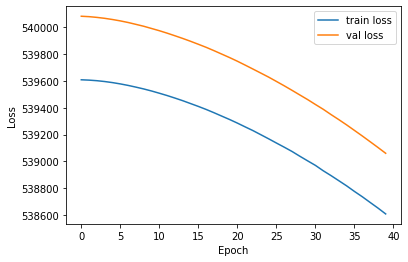

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Nadam(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 5s 9ms/step - loss: 539608.8125 - mae: 539608.6250 - val_loss: 540084.5000 - val_mae: 540084.1875
Epoch 2/40
223/223 [==============================] - 2s 7ms/step - loss: 539606.2500 - mae: 539606.0000 - val_loss: 540081.0000 - val_mae: 540080.9375
Epoch 3/40
223/223 [==============================] - 2s 7ms/step - loss: 539601.8125 - mae: 539601.6250 - val_loss: 540075.5625 - val_mae: 540075.5000
Epoch 4/40
223/223 [==============================] - 2s 7ms/step - loss: 539595.2500 - mae: 539595.0625 - val_loss: 540068.2500 - val_mae: 540068.1250
Epoch 5/40
223/223 [==============================] - 1s 7ms/step - loss: 539587.3750 - mae: 539587.3125 - val_loss: 540059.8125 - val_mae: 540059.6875
Epoch 6/40
223/223 [==============================] - 2s 7ms/step - loss: 539577.4375 - mae: 539577.2500 - val_loss: 540049.1875 - val_mae: 540049.0625
Epoch 7/40
223/223 [==============================] - 2s 7ms/step - loss: 539566.3125 - 

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 6ms/step - loss: 539608.3750 - mae: 539608.3750 - val_loss: 540084.5000 - val_mae: 540084.5000
Epoch 2/40
223/223 [==============================] - 1s 6ms/step - loss: 539606.8125 - mae: 539606.8125 - val_loss: 540082.0000 - val_mae: 540082.0000
Epoch 3/40
223/223 [==============================] - 1s 6ms/step - loss: 539604.4375 - mae: 539604.4375 - val_loss: 540079.1250 - val_mae: 540079.1250
Epoch 4/40
223/223 [==============================] - 1s 6ms/step - loss: 539601.1250 - mae: 539601.1250 - val_loss: 540075.5625 - val_mae: 540075.5625
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 539597.0000 - mae: 539597.0000 - val_loss: 540071.2500 - val_mae: 540071.2500
Epoch 6/40
223/223 [==============================] - 1s 6ms/step - loss: 539592.2500 - mae: 539592.2500 - val_loss: 540066.1250 - val_mae: 540066.1250
Epoch 7/40
223/223 [==============================] - 1s 6ms/step - loss: 539586.6250 - 

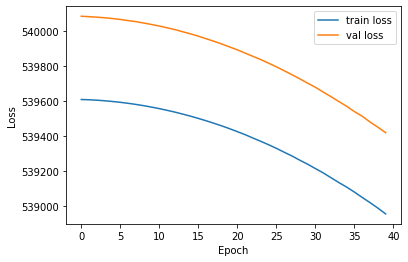

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Momentum & Nesterov

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 5s 6ms/step - loss: 332405.3125 - mae: 332405.2812 - val_loss: 679276.6875 - val_mae: 679276.6875
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 111600.2031 - mae: 111600.2031 - val_loss: 81992.5312 - val_mae: 81992.5312
Epoch 3/40
223/223 [==============================] - 1s 5ms/step - loss: 107621.0000 - mae: 107621.0000 - val_loss: 36961.3945 - val_mae: 36961.3945
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 106908.2578 - mae: 106908.2578 - val_loss: 53138.2617 - val_mae: 53138.2617
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 108843.0703 - mae: 108843.0703 - val_loss: 53862.7578 - val_mae: 53862.7578
Epoch 6/40
223/223 [==============================] - 1s 5ms/step - loss: 106463.1641 - mae: 106463.1641 - val_loss: 42562.5508 - val_mae: 42562.5508
Epoch 7/40
223/223 [==============================] - 1s 5ms/step - loss: 108463.6875 - mae: 10846

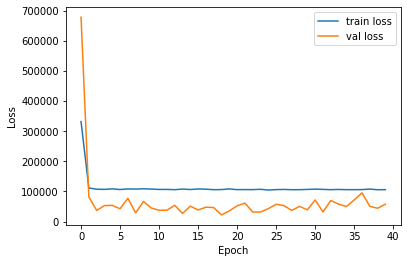

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Final Model

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(nesterov=True),
              metrics=tf.keras.metrics.RootMeanSquaredError())

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
223/223 [==============================] - 2s 5ms/step - loss: 540463.3125 - root_mean_squared_error: 656661.0000 - val_loss: 542838.0000 - val_root_mean_squared_error: 645919.7500
Epoch 2/40
223/223 [==============================] - 1s 5ms/step - loss: 540309.4375 - root_mean_squared_error: 656535.5625 - val_loss: 542173.5625 - val_root_mean_squared_error: 645391.4375
Epoch 3/40
223/223 [==============================] - 1s 5ms/step - loss: 528268.0000 - root_mean_squared_error: 646853.1875 - val_loss: 486394.8125 - val_root_mean_squared_error: 599273.6250
Epoch 4/40
223/223 [==============================] - 1s 5ms/step - loss: 245006.5156 - root_mean_squared_error: 418050.1562 - val_loss: 289287.9688 - val_root_mean_squared_error: 341344.5312
Epoch 5/40
223/223 [==============================] - 1s 5ms/step - loss: 60666.6562 - root_mean_squared_error: 155293.6406 - val_loss: 215419.0000 - val_root_mean_squared_error: 243480.4375
Epoch 6/40
223/223 [=====================

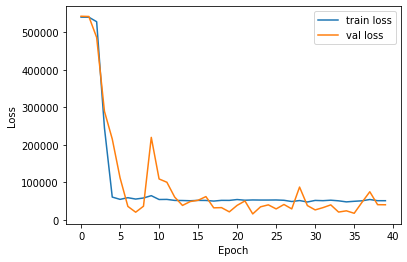

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Evaluation & Prediction

In [ ]:
model.evaluate(X_test_std, y_test) 

68/68 [==============================] - 0s 2ms/step - loss: 39581.6055 - root_mean_squared_error: 104816.7891


[39581.60546875, 104816.7890625]

In [ ]:
X_new = X_test_std[25]

In [ ]:
X_new.shape

(18,)

In [ ]:
X_new = X_new.reshape(1,18)

In [ ]:
X_new.shape

(1, 18)

In [ ]:
y_pred = model.predict(X_new)

hasil prediksi

In [ ]:
y_pred

array([[261948.48]], dtype=float32)

membandingkan dengan data asli

In [ ]:
y_test.iloc[25]

240000.0

## Scaling Y

In [ ]:
y_train_std = y_train/y_train.max()
y_val_std = y_val/y_val.max()
y_test_std = y_test/y_test.max()

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(nesterov=True),
              metrics=tf.keras.metrics.RootMeanSquaredError())

history = model.fit(X_train_std, y_train_std, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val_std),verbose=1)

Epoch 1/40
223/223 [==============================] - 3s 9ms/step - loss: 0.0962 - root_mean_squared_error: 0.1911 - val_loss: 0.0837 - val_root_mean_squared_error: 0.1319
Epoch 2/40
223/223 [==============================] - 2s 8ms/step - loss: 0.0336 - root_mean_squared_error: 0.0602 - val_loss: 0.0849 - val_root_mean_squared_error: 0.1228
Epoch 3/40
223/223 [==============================] - 2s 9ms/step - loss: 0.0263 - root_mean_squared_error: 0.0443 - val_loss: 0.0743 - val_root_mean_squared_error: 0.1035
Epoch 4/40
223/223 [==============================] - 2s 8ms/step - loss: 0.0239 - root_mean_squared_error: 0.0388 - val_loss: 0.0791 - val_root_mean_squared_error: 0.1107
Epoch 5/40
223/223 [==============================] - 2s 8ms/step - loss: 0.0232 - root_mean_squared_error: 0.0373 - val_loss: 0.0801 - val_root_mean_squared_error: 0.1073
Epoch 6/40
223/223 [==============================] - 2s 9ms/step - loss: 0.0226 - root_mean_squared_error: 0.0357 - val_loss: 0.0761 - val_

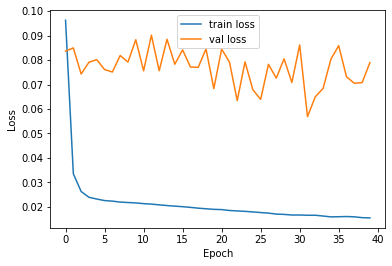

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()